# ***YOLOv8 Model***

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -q pandas pydicom opencv-python-headless scikit-learn segmentation-models-pytorch albumentations tqdm

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 75.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.8/154.8 kB 16.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 124.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [14]:
!pip install ultralytics -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 58.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 869.5 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
!pip install SimpleITK

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52.6/52.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
!ls -l /content/drive/MyDrive/

ls: '/content/drive/MyDrive/CMU_CS 246_HIS_TEAM-5': No such file or directory
total 108344
-rw------- 1 root root    14271 Apr  8 14:40  {041BA208-7662-4148-A8EF-CD035CE6D0E3}.png
-rw------- 1 root root   136552 Apr 14  2021 '[123doc] - giao-an-dien-dan-dung-thpt-bai-2-an-toan-lao-dong-trong-giao-duc-nghe-dien-dan-dung-potx.pdf'
-rw------- 1 root root  1402886 Feb 17  2024  1357807b-1271-47a4-baf7-1bf192025ca2.mp4
-rw------- 1 root root  1312820 Jul 22 06:55  {14609081-9D62-4533-B816-1D5ED577DC0F}.png
-rw------- 1 root root   207821 Apr  4  2023  1680619893760.jpg
-rw------- 1 root root    29560 Apr  5  2023  1680674475012.jpg
-rw------- 1 root root    30175 Apr  5  2023  1680674603455.jpg
-rw------- 1 root root  2691348 Sep  7  2023  1690287514143.jpg
-rw------- 1 root root      177 Jul  4 05:42 '1.¬†¬† Introduction:'$'\n''1.1.¬† Purpose:'$'\n''Place'$'\n''informati....gdoc'
-rw------- 1 root root      177 Jun 29 16:40 '1.¬†¬†¬† So saÃÅnh TRIGGER voÃõÃÅi STORE PROCEDURE?'$'\n''2.....g

In [ ]:
# KI·ªÇM TRA C·∫§P 2
!ls -l /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/

total 24
drwx------ 2 root root 4096 Aug  1 10:54 'CODE SOURCES'
drwx------ 2 root root 4096 Aug  4 03:46  DATA-TRAINING
drwx------ 2 root root 4096 Aug  4 03:49  DATATRAINING-pre
drwx------ 2 root root 4096 Jul 27 03:15  DOCUMENTS
drwx------ 2 root root 4096 Jul 31 03:34  SLIDE
drwx------ 2 root root 4096 Aug  4 05:25  YOLOv8_TRAINING_RESULTS


In [ ]:
# KI·ªÇM TRA C·∫§P 3
!ls -l /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/

total 8
drwx------ 2 root root 4096 Aug  3 06:04 U-NET_Data-Training
drwx------ 2 root root 4096 Jul 31 12:52 YOLOv8_Data-Training


In [ ]:
# KI·ªÇM TRA C·∫§P 4
!ls -l /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/

total 11
drwx------ 2 root root 4096 Jul 31 12:52  Data
drwx------ 2 root root 4096 Jul 31 12:54 'Script (ChuÃõÃÅa maÃÉ leÃ£ÃÇnh Python, coÃÅ theÃÇÃâ duÃÄng ƒëeÃÇÃâ tuÃõÃ£ ƒëaÃÅnh giaÃÅ hieÃ£ÃÇu suaÃÇÃÅt model)'
-rw------- 1 root root 2588 Jul 31 12:53 'YOLOv8 model - GUIDE.txt'


In [ ]:
# Ch·∫°y √¥ n√†y ƒë·ªÉ x√°c minh s·ª± t·ªìn t·∫°i c·ªßa t·ªáp
!ls -l '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data/annotations.csv'

-rw------- 1 root root 136986 Jul 31 12:47 /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data/annotations.csv


In [ ]:
# Ch·∫°y ƒë·ªÉ ki·ªÉm tra n·ªôi dung c·ªßa th∆∞ m·ª•c Data
!ls -l '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data'

total 124662
-rw------- 1 root root   136986 Jul 31 12:47 annotations.csv
-rw------- 1 root root 55427881 Jul 31 12:48 candidates.csv
-rw------- 1 root root 72058556 Jul 31 12:50 candidates_V2.csv
-rw------- 1 root root      740 Jul 31 12:47 sampleSubmission.csv
drwx------ 2 root root     4096 Jul 31 12:57 seg-lungs-LUNA16
drwx------ 2 root root     4096 Aug  1 07:42 subset0
drwx------ 2 root root     4096 Aug  1 07:42 subset1
drwx------ 2 root root     4096 Aug  1 07:42 subset2
drwx------ 2 root root     4096 Aug  1 07:42 subset3
drwx------ 2 root root     4096 Aug  1 07:42 subset4
drwx------ 2 root root     4096 Aug  1 07:42 subset5


## **STAGE 1: TI·ªÄN X·ª¨ L√ù V√Ä CHU·∫®N B·ªä D·ªÆ LI·ªÜU.**

In [ ]:
#-----------------------------------------------------------------------------
# B∆∞·ªõc 1: Import c√°c th∆∞ vi·ªán
#-----------------------------------------------------------------------------
print("‚ñ∂Ô∏è B∆∞·ªõc 1: Import c√°c th∆∞ vi·ªán...")
import SimpleITK as sitk
import pandas as pd
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import shutil

print("‚úÖ Ho√†n t·∫•t import.")

#-----------------------------------------------------------------------------
# B∆∞·ªõc 2: Thi·∫øt l·∫≠p c√°c ƒë∆∞·ªùng d·∫´n
#-----------------------------------------------------------------------------
print("\n‚ñ∂Ô∏è B∆∞·ªõc 2: Thi·∫øt l·∫≠p c√°c ƒë∆∞·ªùng d·∫´n...")

LUNA16_RAW_DATA_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data'
OUTPUT_YOLO_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format'

os.makedirs(OUTPUT_YOLO_PATH, exist_ok=True)
print(f"ƒê∆∞·ªùng d·∫´n d·ªØ li·ªáu g·ªëc ƒë∆∞·ª£c ƒë·∫∑t l√†: {LUNA16_RAW_DATA_PATH}")
print(f"ƒê·∫£m b·∫£o th∆∞ m·ª•c ƒë·∫ßu ra t·ªìn t·∫°i: {OUTPUT_YOLO_PATH}")

#-----------------------------------------------------------------------------
# B∆∞·ªõc 3: ƒê·ªçc v√† x·ª≠ l√Ω t·ªáp annotations
#-----------------------------------------------------------------------------
print("\n‚ñ∂Ô∏è B∆∞·ªõc 3: ƒê·ªçc v√† x·ª≠ l√Ω t·ªáp annotations...")

try:
    annotations_path = os.path.join(LUNA16_RAW_DATA_PATH, 'annotations.csv')
    annotations_df = pd.read_csv(annotations_path)
    print(f"‚úÖ ƒê√£ ƒë·ªçc th√†nh c√¥ng 'annotations.csv'. T√¨m th·∫•y {len(annotations_df)} n·ªët ph·ªïi.")

    #-----------------------------------------------------------------------------
    # B∆∞·ªõc 4: ƒê·ªãnh nghƒ©a c√°c h√†m x·ª≠ l√Ω
    #-----------------------------------------------------------------------------
    print("\n‚ñ∂Ô∏è B∆∞·ªõc 4: ƒê·ªãnh nghƒ©a c√°c h√†m x·ª≠ l√Ω...")
    def world_to_voxel(world_coords, origin, spacing):
        stretched_voxel_coords = np.absolute(world_coords - origin)
        voxel_coords = stretched_voxel_coords / spacing
        return voxel_coords
    def normalize_image(img_array):
        MIN_BOUND = -1000.0
        MAX_BOUND = 400.0
        img_array = (img_array - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
        img_array[img_array > 1] = 1.0
        img_array[img_array < 0] = 0.0
        img_array *= 255.0
        return img_array.astype(np.uint8)
    print("‚úÖ C√°c h√†m ƒë√£ s·∫µn s√†ng.")

    #-----------------------------------------------------------------------------
    # B∆∞·ªõc 5: V√≤ng l·∫∑p ch√≠nh - Tr√≠ch xu·∫•t ·∫£nh v√† t·∫°o nh√£n
    #-----------------------------------------------------------------------------
    print("\n‚ñ∂Ô∏è B∆∞·ªõc 5: B·∫Øt ƒë·∫ßu qu√° tr√¨nh tr√≠ch xu·∫•t ·∫£nh v√† t·∫°o nh√£n...")
    temp_output_dir = os.path.join(OUTPUT_YOLO_PATH, 'temp_all_data')
    if os.path.exists(temp_output_dir): shutil.rmtree(temp_output_dir)
    os.makedirs(os.path.join(temp_output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(temp_output_dir, 'labels'), exist_ok=True)

    processed_files = []

    for _, row in tqdm(annotations_df.iterrows(), total=annotations_df.shape[0], desc="ƒêang x·ª≠ l√Ω c√°c n·ªët ph·ªïi"):
        seriesuid = row['seriesuid']
        mhd_path = ""
        for subdir in os.listdir(LUNA16_RAW_DATA_PATH):
            if subdir.startswith('subset'):
                potential_path = os.path.join(LUNA16_RAW_DATA_PATH, subdir, subdir, f'{seriesuid}.mhd')
                if os.path.exists(potential_path):
                    mhd_path = potential_path
                    break

        if not mhd_path:
            continue

        sitk_image = sitk.ReadImage(mhd_path)
        image_array_3d = sitk.GetArrayFromImage(sitk_image)
        world_coords = np.array([row['coordZ'], row['coordY'], row['coordX']])
        diameter_mm = row['diameter_mm']
        origin = np.array(sitk_image.GetOrigin())
        spacing = np.array(sitk_image.GetSpacing())
        voxel_coords = world_to_voxel(world_coords, np.flip(origin), np.flip(spacing))
        slice_z = int(np.round(voxel_coords[0]))

        if 0 <= slice_z < image_array_3d.shape[0]:
            image_slice_2d = image_array_3d[slice_z, :, :]
            normalized_slice = normalize_image(image_slice_2d)
            img_h, img_w = normalized_slice.shape

            x_center = voxel_coords[2] / img_w
            y_center = voxel_coords[1] / img_h
            width = (diameter_mm / spacing[0]) / img_w
            height = (diameter_mm / spacing[1]) / img_h

            base_filename = f"{seriesuid}_slice{slice_z}"
            Image.fromarray(normalized_slice).save(os.path.join(temp_output_dir, 'images', f"{base_filename}.png"))
            with open(os.path.join(temp_output_dir, 'labels', f"{base_filename}.txt"), 'w') as f:
                f.write(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
            processed_files.append(base_filename)

    print(f"‚úÖ Ho√†n t·∫•t tr√≠ch xu·∫•t. ƒê√£ t·∫°o ra {len(processed_files)} c·∫∑p ·∫£nh/nh√£n.")

    #-----------------------------------------------------------------------------
    # B∆∞·ªõc 6: Chia d·ªØ li·ªáu th√†nh t·∫≠p Train v√† Validation
    #-----------------------------------------------------------------------------
    print("\n‚ñ∂Ô∏è B∆∞·ªõc 6: Chia d·ªØ li·ªáu th√†nh t·∫≠p Train (80%) v√† Validation (20%)...")
    unique_files = list(set(processed_files))
    if len(unique_files) < 2:
        print("L·ªñI: Kh√¥ng ƒë·ªß file ƒë·ªÉ chia. C·∫ßn √≠t nh·∫•t 2 file.")
    else:
        train_files, val_files = train_test_split(unique_files, test_size=0.2, random_state=42)
        for folder in ['train', 'valid']:
            os.makedirs(os.path.join(OUTPUT_YOLO_PATH, folder, 'images'), exist_ok=True)
            os.makedirs(os.path.join(OUTPUT_YOLO_PATH, folder, 'labels'), exist_ok=True)
        def move_files(file_list, dest_folder):
            for filename in tqdm(file_list, desc=f"Di chuy·ªÉn file ƒë·∫øn {dest_folder}"):
                shutil.move(os.path.join(temp_output_dir, 'images', f"{filename}.png"), os.path.join(OUTPUT_YOLO_PATH, dest_folder, 'images', f"{filename}.png"))
                shutil.move(os.path.join(temp_output_dir, 'labels', f"{filename}.txt"), os.path.join(OUTPUT_YOLO_PATH, dest_folder, 'labels', f"{filename}.txt"))
        move_files(train_files, 'train')
        move_files(val_files, 'valid')
        shutil.rmtree(temp_output_dir)

        print("\n ‚úÖ‚úÖ‚úÖ HO√ÄN T·∫§T TO√ÄN B·ªò QU√Å TR√åNH TI·ªÄN X·ª¨ L√ù! ‚úÖ‚úÖ‚úÖ")
        print(f"D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i: {OUTPUT_YOLO_PATH}")


except FileNotFoundError as e:
    print(f"‚ùå L·ªñI: Kh√¥ng t√¨m th·∫•y t·ªáp ho·∫∑c th∆∞ m·ª•c. Vui l√≤ng ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n.")
    print(f"Chi ti·∫øt: {e}")
except Exception as e:
    print(f"ƒê√£ x·∫£y ra l·ªói kh√¥ng x√°c ƒë·ªãnh: {e}")

‚ñ∂Ô∏è B∆∞·ªõc 1: Import c√°c th∆∞ vi·ªán...
‚úÖ Ho√†n t·∫•t import.

‚ñ∂Ô∏è B∆∞·ªõc 2: Thi·∫øt l·∫≠p c√°c ƒë∆∞·ªùng d·∫´n...
ƒê∆∞·ªùng d·∫´n d·ªØ li·ªáu g·ªëc ƒë∆∞·ª£c ƒë·∫∑t l√†: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data
ƒê·∫£m b·∫£o th∆∞ m·ª•c ƒë·∫ßu ra t·ªìn t·∫°i: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format

‚ñ∂Ô∏è B∆∞·ªõc 3: ƒê·ªçc v√† x·ª≠ l√Ω t·ªáp annotations...
‚úÖ ƒê√£ ƒë·ªçc th√†nh c√¥ng 'annotations.csv'. T√¨m th·∫•y 1186 n·ªët ph·ªïi.

‚ñ∂Ô∏è B∆∞·ªõc 4: ƒê·ªãnh nghƒ©a c√°c h√†m x·ª≠ l√Ω...
‚úÖ C√°c h√†m ƒë√£ s·∫µn s√†ng.

‚ñ∂Ô∏è B∆∞·ªõc 5: B·∫Øt ƒë·∫ßu qu√° tr√¨nh tr√≠ch xu·∫•t ·∫£nh v√† t·∫°o nh√£n...


ƒêang x·ª≠ l√Ω c√°c n·ªët ph·ªïi: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1186/1186 [22:17<00:00,  1.13s/it]


‚úÖ Ho√†n t·∫•t tr√≠ch xu·∫•t. ƒê√£ t·∫°o ra 723 c·∫∑p ·∫£nh/nh√£n.

‚ñ∂Ô∏è B∆∞·ªõc 6: Chia d·ªØ li·ªáu th√†nh t·∫≠p Train (80%) v√† Validation (20%)...


Di chuy·ªÉn file ƒë·∫øn valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 144/144 [00:00<00:00, 176.96it/s]



üéâüéâüéâ HO√ÄN T·∫§T TO√ÄN B·ªò QU√Å TR√åNH TI·ªÄN X·ª¨ L√ù! üéâüéâüéâ
D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format


## **STAGE 2: KI·ªÇM TRA L·∫†I D·ªÆ LI·ªÜU ƒê√É X·ª¨ L√ù.**


ƒêang v·∫Ω ·∫£nh v√† bounding box t∆∞∆°ng ·ª©ng...


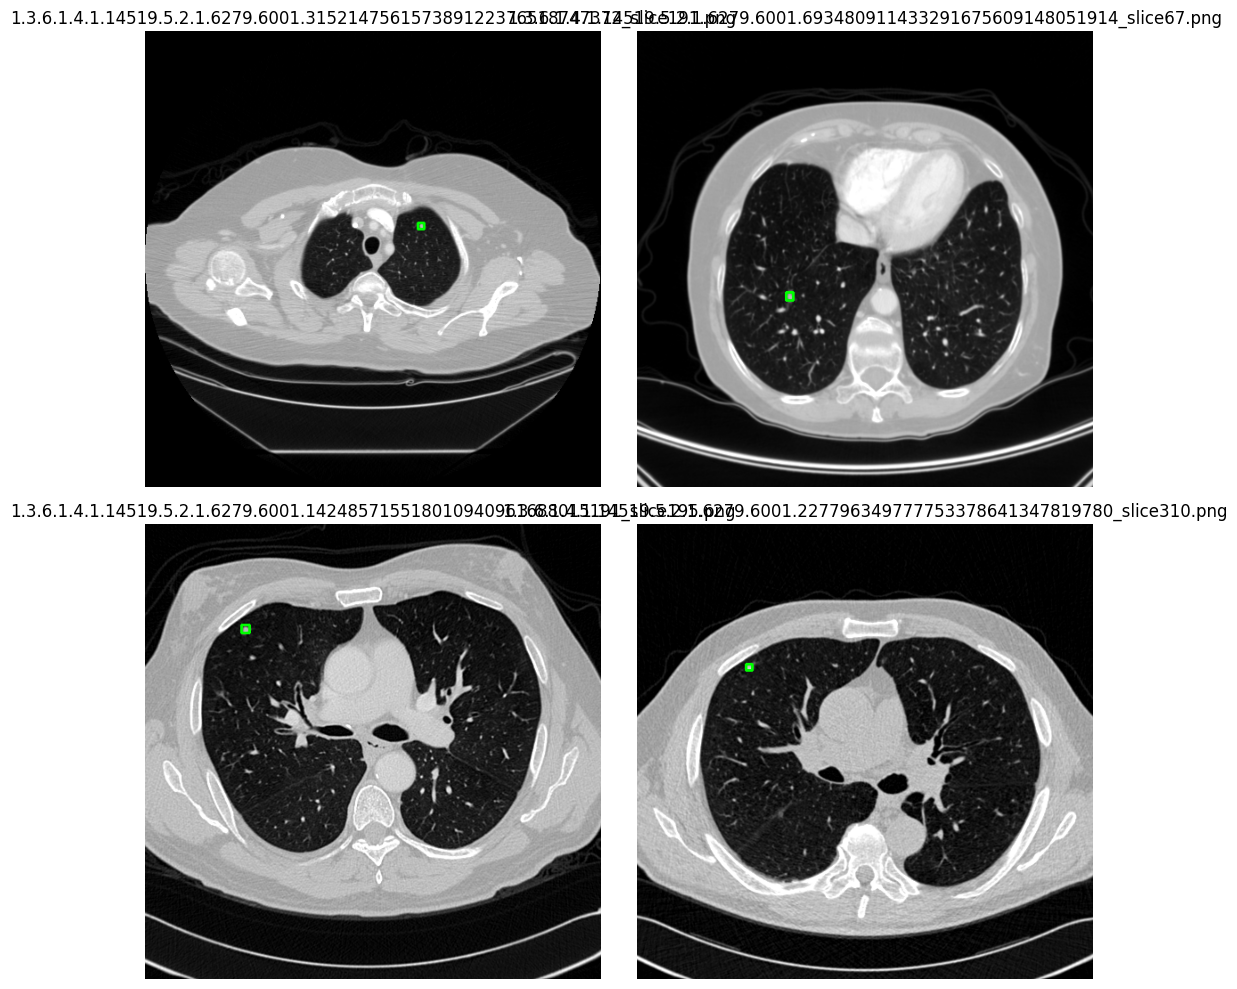

In [ ]:
import cv2
import random
import os
import matplotlib.pyplot as plt

# --- C·∫§U H√åNH ---
YOLO_DATA_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format'
# ---

# Ch·ªçn m·ªôt v√†i ·∫£nh ng·∫´u nhi√™n t·ª´ t·∫≠p hu·∫•n luy·ªán
train_img_dir = os.path.join(YOLO_DATA_PATH, 'train/images')
train_label_dir = os.path.join(YOLO_DATA_PATH, 'train/labels')

if not os.path.exists(train_img_dir):
    print(f"L·ªñI: Kh√¥ng t√¨m th·∫•y th∆∞ m·ª•c ·∫£nh hu·∫•n luy·ªán t·∫°i: {train_img_dir}")
else:
    image_files = os.listdir(train_img_dir)
    if len(image_files) < 4:
        print(f"T√¨m th·∫•y √≠t h∆°n 4 ·∫£nh, s·∫Ω hi·ªÉn th·ªã {len(image_files)} ·∫£nh.")
        random_images = image_files
    else:
        random_images = random.sample(image_files, 4)

    # Thi·∫øt l·∫≠p plot
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    print("ƒêang v·∫Ω ·∫£nh v√† bounding box t∆∞∆°ng ·ª©ng...")

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(train_img_dir, img_name)
        image = cv2.imread(img_path)
        h, w, _ = image.shape
        label_path = os.path.join(train_label_dir, os.path.splitext(img_name)[0] + '.txt')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                line = f.readline()
                parts = line.strip().split()
                x_center, y_center, width_norm, height_norm = map(float, parts[1:])
                x_min = int((x_center - width_norm / 2) * w)
                y_min = int((y_center - height_norm / 2) * h)
                x_max = int((x_center + width_norm / 2) * w)
                y_max = int((y_center + height_norm / 2) * h)
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[i].set_title(img_name)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

## **STAGE 3: T·∫†O T·ªÜP C·∫§U H√åNH .yaml**

In [ ]:
import yaml

# !! H√£y ch·∫Øc ch·∫Øn ƒë∆∞·ªùng d·∫´n n√†y ƒë√∫ng !!
YOLO_FORMAT_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format'

# T·∫°o n·ªôi dung cho t·ªáp YAML
data_config = {
    'path': YOLO_FORMAT_PATH,
    'train': 'train/images',
    'val': 'valid/images',
    'names': {
        0: 'nodule'
    }
}

# Ghi t·ªáp YAML
yaml_file_path = '/content/luna16_processed.yaml'
with open(yaml_file_path, 'w') as f:
    yaml.dump(data_config, f)

print(f"T·ªáp c·∫•u h√¨nh '{yaml_file_path}' ƒë√£ ƒë∆∞·ª£c t·∫°o th√†nh c√¥ng.")

T·ªáp c·∫•u h√¨nh '/content/luna16_processed.yaml' ƒë√£ ƒë∆∞·ª£c t·∫°o th√†nh c√¥ng.


## **FINAL STAGE: TRAIN THE MODEL.**

In [ ]:
from ultralytics import YOLO
import torch

# Gi·∫£i ph√≥ng b·ªô nh·ªõ cache c·ªßa GPU (h·ªØu √≠ch khi ch·∫°y l·∫°i)
torch.cuda.empty_cache()

# T·∫£i m√¥ h√¨nh YOLOv8 g·ªëc
model = YOLO('yolov8n.pt') # 'n' (nano) l√† b·∫£n nh·ªè nh·∫•t, b·∫°n c√≥ th·ªÉ th·ª≠ 's' (small) ho·∫∑c 'm' (medium)

# B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán!
results = model.train(
    data='/content/luna16_processed.yaml',
    epochs=100,      # S·ªë chu k·ª≥ hu·∫•n luy·ªán, 100 l√† m·ªôt kh·ªüi ƒë·∫ßu t·ªët
    imgsz=640,       # K√≠ch th∆∞·ªõc ·∫£nh ƒë·∫ßu v√†o
    batch=8,         # Gi·∫£m xu·ªëng 8 ho·∫∑c 4 n·∫øu g·∫∑p l·ªói h·∫øt b·ªô nh·ªõ (CUDA out of memory)
    project='/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS',
    name='luna16_final_run',
    exist_ok=True    # Cho ph√©p ghi ƒë√® l√™n l·∫ßn ch·∫°y tr∆∞·ªõc n·∫øu c√≥
)

print("‚úÖ Ho√†n t·∫•t qu√° tr√¨nh hu·∫•n luy·ªán! ‚úÖ")

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.173 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/luna16_processed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=luna16_final_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 0.6¬±0.2 ms, read: 5.4¬±11.3 MB/s, size: 121.4 KB)


train: Scanning /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/train/labels... 574 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 574/574 [02:50<00:00,  3.36it/s] 


train: New cache created: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 1.2¬±1.4 ms, read: 12.4¬±16.8 MB/s, size: 115.9 KB)


val: Scanning /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/labels... 144 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 144/144 [00:42<00:00,  3.40it/s]

val: New cache created: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/labels.cache


Plotting labels to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.08G      2.363      8.589      1.115         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:17<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:03<00:00,  2.88it/s]

                   all        144        144   0.000231     0.0694   0.000125   6.79e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.33G       2.18      5.395      1.025          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.70it/s]


                   all        144        144      0.303      0.347        0.2     0.0763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.35G      2.187      4.491      1.059          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.91it/s]


                   all        144        144      0.669      0.417      0.497      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.37G      2.113      3.759      1.014          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.47it/s]


                   all        144        144      0.559      0.485      0.458       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.38G      2.007      2.879      1.028          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.58it/s]


                   all        144        144      0.396      0.436      0.322       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.4G      2.032      2.373      0.999          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.53it/s]

                   all        144        144      0.648      0.562      0.532      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.42G      1.914      2.113     0.9877          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.02it/s]


                   all        144        144      0.645      0.611      0.618      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.44G      2.003      1.997      1.009          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.81it/s]


                   all        144        144      0.738      0.626      0.673       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.45G      1.905      1.822     0.9669          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.50it/s]

                   all        144        144      0.727      0.609      0.697      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.47G      1.913      1.589     0.9663          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.77it/s]

                   all        144        144      0.722      0.596      0.675      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.49G      1.893      1.738     0.9801          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.36it/s]

                   all        144        144       0.57      0.569      0.581      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.51G      1.823      1.552     0.9572          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.54it/s]

                   all        144        144      0.639      0.591      0.613      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.52G      1.861      1.627     0.9802          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.69it/s]

                   all        144        144      0.684      0.625      0.698      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.54G      1.879      1.538      1.003          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.86it/s]

                   all        144        144       0.69      0.664      0.662      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.56G       1.75      1.492     0.9361          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.14it/s]

                   all        144        144      0.648      0.667      0.646       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.57G      1.792      1.408     0.9536          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.98it/s]

                   all        144        144      0.674      0.639      0.658        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.59G      1.773      1.417      0.964         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.15it/s]

                   all        144        144      0.645      0.674      0.701      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.61G      1.751      1.394     0.9485          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.11it/s]

                   all        144        144      0.687      0.632      0.706      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.62G      1.868      1.476     0.9693          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.27it/s]

                   all        144        144      0.705      0.615       0.67      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.64G      1.801      1.349     0.9496          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.02it/s]

                   all        144        144      0.708      0.624      0.673      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.66G       1.74      1.404     0.9375          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:03<00:00,  2.82it/s]

                   all        144        144      0.726       0.59      0.693      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.68G      1.777      1.403     0.9565         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  6.16it/s]

                   all        144        144      0.789      0.621      0.727      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.69G      1.723      1.255       0.95         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.27it/s]

                   all        144        144      0.673      0.715      0.706      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.71G      1.711       1.21     0.9735          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.17it/s]

                   all        144        144       0.68      0.667       0.68      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.73G       1.76      1.301     0.9675          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.41it/s]

                   all        144        144      0.795      0.648      0.712      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.74G      1.735      1.327     0.9233          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.45it/s]

                   all        144        144      0.808        0.7      0.768      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.76G      1.718      1.213     0.9394         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.43it/s]

                   all        144        144      0.749      0.706      0.717      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.78G      1.619      1.199     0.9444          3        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  6.48it/s]

                   all        144        144      0.844      0.715      0.798      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.79G      1.719      1.188     0.9158         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.26it/s]

                   all        144        144      0.679      0.674      0.694      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.81G      1.755      1.263     0.9301         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.42it/s]

                   all        144        144      0.704      0.694      0.733      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.83G      1.722      1.256     0.9531          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.85it/s]

                   all        144        144      0.685      0.726      0.762      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.85G      1.672      1.174      0.925          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.37it/s]

                   all        144        144      0.758      0.696      0.743      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.86G      1.636       1.16     0.9141          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.44it/s]

                   all        144        144      0.767      0.694      0.724      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.88G      1.675      1.194     0.9277         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.78it/s]

                   all        144        144      0.801      0.753      0.794      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.9G      1.616      1.139     0.9321         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:16<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.42it/s]

                   all        144        144      0.713       0.75      0.766      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.92G      1.581      1.101     0.9404         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.70it/s]


                   all        144        144      0.682      0.729      0.728      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.93G      1.611      1.104     0.9319          3        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.20it/s]

                   all        144        144      0.763      0.736      0.778       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.95G      1.581        1.1     0.9222          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.07it/s]

                   all        144        144      0.787      0.688       0.76      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.97G      1.619      1.113     0.9453          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.22it/s]

                   all        144        144      0.723      0.722      0.786      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.98G      1.578      1.072     0.9102          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.26it/s]

                   all        144        144      0.683      0.779      0.767      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         2G      1.615      1.136     0.9123          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.56it/s]

                   all        144        144      0.722      0.708      0.774      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.02G      1.571      1.041      0.922          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.71it/s]

                   all        144        144      0.734      0.764      0.793      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.04G      1.551      1.041     0.8886          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.29it/s]

                   all        144        144      0.739      0.701      0.777      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.05G      1.598        1.1     0.9055          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.40it/s]

                   all        144        144      0.813      0.694      0.781      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.07G      1.559     0.9831     0.9116         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.16it/s]

                   all        144        144      0.677      0.812      0.763      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.09G      1.607       1.05     0.9317          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.41it/s]

                   all        144        144      0.703      0.764      0.764      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.1G      1.553     0.9966     0.9192          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.04it/s]

                   all        144        144      0.795      0.674      0.766      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.12G      1.612      1.072     0.9213         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.96it/s]

                   all        144        144      0.756      0.712       0.76      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.14G      1.488     0.9917     0.9053         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.98it/s]

                   all        144        144      0.711      0.753      0.765      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.15G      1.593     0.9588     0.9214          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.77it/s]

                   all        144        144       0.78      0.799      0.804        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.17G      1.504     0.9898     0.8868          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.63it/s]

                   all        144        144      0.759      0.812       0.82       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.19G      1.502     0.9565      0.927          3        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:16<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.67it/s]


                   all        144        144       0.76      0.799      0.807      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.21G      1.589     0.9642     0.9116          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.28it/s]

                   all        144        144        0.8      0.771      0.807      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.22G      1.562     0.9917      0.897         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.13it/s]

                   all        144        144      0.775      0.791      0.791      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G      1.489     0.9731     0.9067         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.18it/s]

                   all        144        144      0.794      0.792      0.816      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.26G      1.514     0.9974     0.8828          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.63it/s]

                   all        144        144       0.77      0.785        0.8       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.27G      1.499     0.9985     0.8842          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.80it/s]

                   all        144        144      0.799      0.743      0.819      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.29G       1.49     0.9711     0.8931          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.35it/s]

                   all        144        144      0.773      0.852      0.821      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.31G      1.438     0.8719      0.913         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.53it/s]

                   all        144        144      0.755      0.815      0.818      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.32G       1.51     0.9205     0.8976          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.70it/s]

                   all        144        144      0.776       0.77      0.806      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.34G      1.436     0.8989     0.9011          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.42it/s]

                   all        144        144      0.773      0.792      0.785      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G      1.498     0.9337     0.9123          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  6.12it/s]

                   all        144        144      0.752      0.743      0.765      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G      1.405     0.8863     0.8925          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.55it/s]

                   all        144        144      0.745      0.792      0.783      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.39G       1.45     0.9081      0.898          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.20it/s]

                   all        144        144      0.742      0.792      0.795      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.41G      1.444      0.907     0.8987          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.66it/s]


                   all        144        144      0.812      0.749      0.785      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.43G      1.415     0.9097      0.897          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.88it/s]

                   all        144        144      0.704      0.799      0.776      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.45G      1.423     0.8709     0.9152          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.41it/s]

                   all        144        144      0.749      0.705      0.771       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.46G      1.376     0.8813     0.8914          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.22it/s]

                   all        144        144      0.771       0.75      0.773      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.48G      1.412     0.8644     0.8792          3        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.94it/s]

                   all        144        144      0.762      0.792      0.799       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.5G      1.495     0.9082     0.8926          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.63it/s]

                   all        144        144      0.701      0.765      0.762      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.51G      1.338     0.8567     0.8859          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.06it/s]

                   all        144        144      0.786      0.722      0.761      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.53G      1.384     0.9071     0.8788         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.11it/s]

                   all        144        144      0.767      0.709      0.763      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.55G       1.47     0.9052     0.8712         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.81it/s]

                   all        144        144      0.748      0.806      0.791      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.56G      1.362     0.8436     0.8765          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.13it/s]

                   all        144        144      0.781      0.812      0.789       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.58G      1.415     0.8771     0.8758          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.44it/s]

                   all        144        144       0.78      0.715      0.763      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.6G      1.372     0.8164     0.8914          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.51it/s]

                   all        144        144      0.743      0.763      0.772      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.62G      1.385     0.8539     0.8727         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  6.18it/s]

                   all        144        144      0.784      0.729      0.768      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.63G      1.369     0.8236      0.871          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.11it/s]

                   all        144        144      0.768      0.806      0.791      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.65G      1.306     0.7709     0.8716          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  6.01it/s]

                   all        144        144      0.813      0.736      0.789      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.67G      1.393     0.8332     0.8775         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.98it/s]

                   all        144        144      0.772      0.775      0.788      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.68G      1.291     0.7617     0.8513         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.82it/s]

                   all        144        144      0.734      0.786      0.786      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.7G      1.346     0.7897     0.8842          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.55it/s]

                   all        144        144      0.794      0.805      0.808      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.72G      1.272     0.8196     0.8903          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  4.87it/s]


                   all        144        144      0.816      0.803      0.821      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.73G       1.29     0.7795     0.8699          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.64it/s]

                   all        144        144      0.791      0.799      0.813      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.75G      1.317     0.7959     0.8734          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.51it/s]

                   all        144        144      0.785       0.81      0.803      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.77G      1.379     0.8163     0.8652         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.54it/s]

                   all        144        144      0.788      0.833      0.811      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.79G      1.264     0.7669     0.8605          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.48it/s]

                   all        144        144      0.779      0.806      0.807      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.8G      1.256     0.7722     0.8558         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.96it/s]

                   all        144        144      0.764      0.799      0.811      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.82G      1.238     0.7052     0.8518          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  6.11it/s]

                   all        144        144      0.789      0.805      0.804       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.84G      1.285     0.7159     0.8633          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.47it/s]

                   all        144        144      0.786      0.767      0.803      0.419


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.85G      1.257     0.7094     0.8697          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:15<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.61it/s]

                   all        144        144      0.753      0.782      0.791      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.87G      1.273       0.72     0.8793          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.71it/s]

                   all        144        144      0.769      0.787      0.801      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.88G      1.212     0.6684     0.8723          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.09it/s]

                   all        144        144      0.785      0.799      0.788      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.9G      1.191     0.6776     0.8686          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.12it/s]

                   all        144        144       0.78      0.811      0.784      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.92G      1.174     0.6782     0.8589          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  4.14it/s]

                   all        144        144      0.769      0.792       0.79      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.94G      1.206     0.6808     0.8753          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.38it/s]


                   all        144        144      0.817      0.764      0.789      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.95G      1.178     0.6849     0.8463          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.55it/s]

                   all        144        144      0.807      0.756      0.795      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.97G      1.187     0.6579     0.8674          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.59it/s]

                   all        144        144        0.8      0.777      0.794       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.99G      1.151     0.6542     0.8613          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.27it/s]

                   all        144        144      0.806      0.757      0.797      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         3G      1.142     0.6396     0.8452          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:14<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:02<00:00,  3.40it/s]

                   all        144        144      0.801      0.743      0.797      0.422



100 epochs completed in 0.484 hours.
Optimizer stripped from /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt...
Ultralytics 8.3.173 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:03<00:00,  2.97it/s]


                   all        144        144      0.795      0.807      0.809      0.447
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run
üéâ Ho√†n t·∫•t qu√° tr√¨nh hu·∫•n luy·ªán! üéâ


## **TESTING**


image 1/1 /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/images/1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306_slice96.png: 640x640 1 nodule, 12.7ms
Speed: 8.2ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


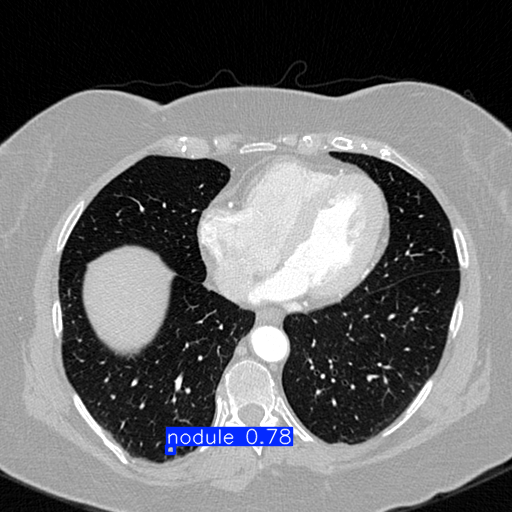

In [20]:
from ultralytics import YOLO
from PIL import Image

# 1. Install M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán 'best.pt'
model = YOLO('/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt')

# 2. Cung c·∫•p ƒë∆∞·ªùng d·∫´n ƒë·∫øn ·∫£nh th·ª≠ nghi·ªám
path_to_test_image = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/images/1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306_slice96.png'

# 3. Th·ª±c hi·ªán d·ª± ƒëo√°n
results = model(path_to_test_image)

# 4. Hi·ªÉn th·ªã k·∫øt qu·∫£
# YOLOv8 t·ª± ƒë·ªông l∆∞u ·∫£nh k·∫øt qu·∫£ v√†o th∆∞ m·ª•c runs/detect/predict.
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    display(im)

## **CHUY·ªÇN ƒê·ªîI .pt SANG .onnx ƒê·ªÇ T√çCH H·ª¢P V√ÄO WEBSITE.**

In [ ]:
from ultralytics import YOLO

# T·∫£i m√¥ h√¨nh best.pt
model = YOLO('/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt')

# Th·ª±c hi·ªán chuy·ªÉn ƒë·ªïi sang ƒë·ªãnh d·∫°ng ONNX
# T·ªáp .onnx s·∫Ω ƒë∆∞·ª£c l∆∞u trong c√πng th∆∞ m·ª•c v·ªõi t·ªáp best.pt
model.export(format='onnx')

print("\n ‚úÖ Ho√†n t·∫•t! T·ªáp 'best.onnx' ƒë√£ ƒë∆∞·ª£c t·∫°o th√†nh c√¥ng. ‚úÖ")
print("B·∫°n c√≥ th·ªÉ t√¨m th·∫•y n√≥ trong th∆∞ m·ª•c .../weights/ c·ªßa l·∫ßn ch·∫°y v·ª´a r·ªìi.")

Ultralytics 8.3.173 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
üí° ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ‚úÖ 8.4s
WARNING ‚ö†Ô∏è requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.62...
ONNX: export success ‚úÖ 10.9s, saved as '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_fina

# ***U-Net Model***

**1. C√†i ƒë·∫∑t th∆∞ vi·ªán**

In [2]:
!pip install kaggle pydicom -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 36.7 MB/s eta 0:00:00


**2. Thi·∫øt l·∫≠p m√¥i tr∆∞·ªùng**

In [3]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import pydicom
from skimage.transform import resize
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import glob
import tensorflow as tf

# K·∫øt n·ªëi Google Drive
print("‚ñ∂Ô∏è K·∫øt n·ªëi Google Drive...")
drive.mount('/content/drive')

# C√†i ƒë·∫∑t th∆∞ vi·ªán Pydicom
print("\n‚ñ∂Ô∏è C√†i ƒë·∫∑t Pydicom...")
!pip install pydicom -q

# --- ƒê∆Ø·ªúNG D·∫™N D·ªÆ LI·ªÜU ---
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn d·ªØ li·ªáu g·ªëc tr√™n Google Drive c·ªßa b·∫°n
DATA_DIR_DRIVE = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training'
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c s·∫Ω l∆∞u d·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω tr√™n b·ªô nh·ªõ t·∫°m c·ªßa Colab (ƒë·ªÉ truy c·∫≠p nhanh)
PREPROCESSED_DIR = '/content/preprocessed_data/'
# ---

print(f"\n‚úÖ D·ªØ li·ªáu g·ªëc t·ª´: {DATA_DIR_DRIVE}")
print(f"‚úÖ D·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω s·∫Ω ƒë∆∞·ª£c l∆∞u t·∫°i: {PREPROCESSED_DIR}")

‚ñ∂Ô∏è K·∫øt n·ªëi Google Drive...
Mounted at /content/drive

‚ñ∂Ô∏è C√†i ƒë·∫∑t Pydicom...

‚úÖ D·ªØ li·ªáu g·ªëc t·ª´: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training
‚úÖ D·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω s·∫Ω ƒë∆∞·ª£c l∆∞u t·∫°i: /content/preprocessed_data/


## **Stage 1: Ti·ªÅn x·ª≠ l√Ω**

In [5]:
# @title 1.1. L·ªçc v√† ph√¢n chia ID b·ªánh nh√¢n
# --- C·∫•u h√¨nh ---
IMG_SIZE = 256
# ---

# ƒê·ªçc t·ªáp CSV
print("‚ñ∂Ô∏è ƒê·ªçc t·ªáp stage_2_train_labels.csv...")
labels_df = pd.read_csv(os.path.join(DATA_DIR_DRIVE, 'stage_2_train_labels.csv'))

# T·∫°o dictionary bounding box
print("‚ñ∂Ô∏è T·∫°o dictionary bounding box...")
patient_boxes = {}
pneumonia_cases = labels_df[labels_df['Target'] == 1]
for _, row in pneumonia_cases.iterrows():
    patient_id = row['patientId']
    box = [int(row['x']), int(row['y']), int(row['width']), int(row['height'])]
    if patient_id in patient_boxes:
        patient_boxes[patient_id].append(box)
    else:
        patient_boxes[patient_id] = [box]

# L·ªçc danh s√°ch patientId ƒë·ªÉ ƒë·∫£m b·∫£o ch·ªâ nh·ªØng ID c√≥ file ·∫£nh t·ªìn t·∫°i m·ªõi ƒë∆∞·ª£c s·ª≠ d·ª•ng
print("\n‚ñ∂Ô∏è L·ªçc danh s√°ch Patient ID c√≥ t·ªáp ·∫£nh t·ªìn t·∫°i...")
image_dir = os.path.join(DATA_DIR_DRIVE, 'stage_2_train_images')
all_patient_ids_from_csv = labels_df['patientId'].unique()
available_image_paths = glob.glob(os.path.join(image_dir, '*.dcm'))
available_patient_ids = {os.path.splitext(os.path.basename(p))[0] for p in available_image_paths}
valid_patient_ids = [pid for pid in all_patient_ids_from_csv if pid in available_patient_ids]
print(f"‚úÖ S·ªë l∆∞·ª£ng ID h·ª£p l·ªá s·∫Ω ƒë∆∞·ª£c d√πng: {len(valid_patient_ids)}")

# Chia d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c l·ªçc th√†nh t·∫≠p Train v√† Validation
print("\n‚ñ∂Ô∏è Chia d·ªØ li·ªáu ƒë√£ l·ªçc th√†nh t·∫≠p Train v√† Validation...")
train_ids, val_ids = train_test_split(valid_patient_ids, test_size=0.2, random_state=42)
print(f"S·ªë l∆∞·ª£ng ·∫£nh hu·∫•n luy·ªán: {len(train_ids)}")
print(f"S·ªë l∆∞·ª£ng ·∫£nh x√°c th·ª±c: {len(val_ids)}")

‚ñ∂Ô∏è ƒê·ªçc t·ªáp stage_2_train_labels.csv...
‚ñ∂Ô∏è T·∫°o dictionary bounding box...

‚ñ∂Ô∏è L·ªçc danh s√°ch Patient ID c√≥ t·ªáp ·∫£nh t·ªìn t·∫°i...
‚úÖ S·ªë l∆∞·ª£ng ID h·ª£p l·ªá s·∫Ω ƒë∆∞·ª£c d√πng: 3500

‚ñ∂Ô∏è Chia d·ªØ li·ªáu ƒë√£ l·ªçc th√†nh t·∫≠p Train v√† Validation...
S·ªë l∆∞·ª£ng ·∫£nh hu·∫•n luy·ªán: 2800
S·ªë l∆∞·ª£ng ·∫£nh x√°c th·ª±c: 700


In [6]:
# @title 1.2. Ch·∫°y qu√° tr√¨nh ti·ªÅn x·ª≠ l√Ω v√† l∆∞u file .npy
print("‚ñ∂Ô∏è B·∫Øt ƒë·∫ßu qu√° tr√¨nh ti·ªÅn x·ª≠ l√Ω to√†n b·ªô d·ªØ li·ªáu (c√≥ th·ªÉ m·∫•t m·ªôt l√∫c)...")

# T·∫°o c√°c th∆∞ m·ª•c con trong b·ªô nh·ªõ t·∫°m
os.makedirs(os.path.join(PREPROCESSED_DIR, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(PREPROCESSED_DIR, 'train/masks'), exist_ok=True)
os.makedirs(os.path.join(PREPROCESSED_DIR, 'valid/images'), exist_ok=True)
os.makedirs(os.path.join(PREPROCESSED_DIR, 'valid/masks'), exist_ok=True)

def preprocess_and_save(patient_ids, patient_boxes_dict, set_name):
    print(f"\nB·∫Øt ƒë·∫ßu x·ª≠ l√Ω v√† l∆∞u t·∫≠p {set_name}...")
    for patient_id in tqdm(patient_ids):
        # ƒê·ªçc v√† resize ·∫£nh
        dcm_path = os.path.join(DATA_DIR_DRIVE, 'stage_2_train_images', f'{patient_id}.dcm')
        image = pydicom.dcmread(dcm_path).pixel_array
        resized_image = resize(image, (IMG_SIZE, IMG_SIZE, 1), mode='symmetric', preserve_range=True)

        # T·∫°o v√† resize mask
        mask = np.zeros((1024, 1024))
        if patient_id in patient_boxes_dict:
            for box in patient_boxes_dict[patient_id]:
                x, y, w, h = box
                mask[y:y+h, x:x+w] = 1
        resized_mask = resize(mask, (IMG_SIZE, IMG_SIZE, 1), mode='symmetric', preserve_range=True)

        # Chu·∫©n h√≥a
        normalized_image = (resized_image / 255.0).astype(np.float32)
        binary_mask = (resized_mask > 0.5).astype(np.float32)

        # L∆∞u ra file .npy v√†o b·ªô nh·ªõ t·∫°m
        np.save(os.path.join(PREPROCESSED_DIR, set_name, 'images', f'{patient_id}.npy'), normalized_image)
        np.save(os.path.join(PREPROCESSED_DIR, set_name, 'masks', f'{patient_id}.npy'), binary_mask)

# Ch·∫°y cho c·∫£ t·∫≠p train v√† validation
preprocess_and_save(train_ids, patient_boxes, 'train')
preprocess_and_save(val_ids, patient_boxes, 'valid')

print("\n‚úÖ Ho√†n t·∫•t Giai ƒëo·∫°n 1! D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω v√† s·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán.")

‚ñ∂Ô∏è B·∫Øt ƒë·∫ßu qu√° tr√¨nh ti·ªÅn x·ª≠ l√Ω to√†n b·ªô d·ªØ li·ªáu (c√≥ th·ªÉ m·∫•t m·ªôt l√∫c)...

B·∫Øt ƒë·∫ßu x·ª≠ l√Ω v√† l∆∞u t·∫≠p train...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2800/2800 [06:19<00:00,  7.38it/s]



B·∫Øt ƒë·∫ßu x·ª≠ l√Ω v√† l∆∞u t·∫≠p valid...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 700/700 [01:00<00:00, 11.58it/s]


‚úÖ Ho√†n t·∫•t Giai ƒëo·∫°n 1! D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω v√† s·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán.


## **Stage 2: Quy tr√¨nh Hu·∫•n luy·ªán (High Speed)**

In [7]:
# @title 2.1. T·∫°o Data Generator ƒë·ªçc file .npy
def data_generator_npy(patient_ids, set_name, batch_size=16):
    base_dir = os.path.join(PREPROCESSED_DIR, set_name)
    image_dir = os.path.join(base_dir, 'images')
    mask_dir = os.path.join(base_dir, 'masks')

    ids_to_use = [pid for pid in patient_ids if os.path.exists(os.path.join(image_dir, f'{pid}.npy'))]

    while True:
        np.random.shuffle(ids_to_use)
        for i in range(0, len(ids_to_use), batch_size):
            batch_ids = ids_to_use[i:i+batch_size]
            batch_images = np.zeros((len(batch_ids), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
            batch_masks = np.zeros((len(batch_ids), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

            for j, patient_id in enumerate(batch_ids):
                batch_images[j] = np.load(os.path.join(image_dir, f'{patient_id}.npy'))
                batch_masks[j] = np.load(os.path.join(mask_dir, f'{patient_id}.npy'))

            yield batch_images, batch_masks

# T·∫°o c√°c generator m·ªõi
BATCH_SIZE = 16
train_gen = data_generator_npy(train_ids, 'train', batch_size=BATCH_SIZE)
val_gen = data_generator_npy(val_ids, 'valid', batch_size=BATCH_SIZE)
print("‚úÖ ƒê√£ t·∫°o Data Generator t·ªëc ƒë·ªô cao.")

‚úÖ ƒê√£ t·∫°o Data Generator t·ªëc ƒë·ªô cao.


In [8]:
# @title 2.2. X√¢y d·ª±ng v√† Bi√™n d·ªãch m√¥ h√¨nh
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Ki·ªÉm tra GPU
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("‚úÖ GPU ƒë√£ ƒë∆∞·ª£c b·∫≠t v√† s·∫µn s√†ng:", gpu_devices)
else:
    print("‚ùå C·∫¢NH B√ÅO: Kh√¥ng t√¨m th·∫•y GPU. T·ªëc ƒë·ªô s·∫Ω r·∫•t ch·∫≠m.")

# X√¢y d·ª±ng m√¥ h√¨nh U-Net (gi·ªØ nguy√™n)
def build_unet(input_shape):
    inputs = Input(input_shape)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    return Model(inputs=[inputs], outputs=[outputs])

# ƒê·ªãnh nghƒ©a Dice Coefficient v√† Dice Loss
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

# Kh·ªüi t·∫°o v√† bi√™n d·ªãch m√¥ h√¨nh
model = build_unet((IMG_SIZE, IMG_SIZE, 1))
model.compile(optimizer=Adam(learning_rate=1e-4), loss=dice_loss, metrics=[dice_coef, 'binary_accuracy'])
print("\n‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c x√¢y d·ª±ng v√† bi√™n d·ªãch.")

‚úÖ GPU ƒë√£ ƒë∆∞·ª£c b·∫≠t v√† s·∫µn s√†ng: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c x√¢y d·ª±ng v√† bi√™n d·ªãch.


In [9]:
# @title 2.3. Hu·∫•n luy·ªán m√¥ h√¨nh
# Thi·∫øt l·∫≠p Callbacks ƒë·ªÉ l∆∞u model t·ªët nh·∫•t
MODEL_SAVE_PATH = os.path.join(DATA_DIR_DRIVE, 'unet_rsna_best_fast.keras')
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_dice_coef', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coef', mode='max', patience=5, verbose=1)

print("\n‚ñ∂Ô∏è B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán t·ªëc ƒë·ªô cao...")
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_ids) // BATCH_SIZE,
    epochs=25,
    validation_data=val_gen,
    validation_steps=len(val_ids) // BATCH_SIZE,
    callbacks=[checkpoint, early_stopping]
)
print("\n‚úÖ‚úÖ‚úÖ HO√ÄN T·∫§T QU√Å TR√åNH HU·∫§N LUY·ªÜN! ‚úÖ‚úÖ‚úÖ")


‚ñ∂Ô∏è B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán t·ªëc ƒë·ªô cao...
Epoch 1/25
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 93ms/step - binary_accuracy: 0.0675 - dice_coef: 0.0238 - loss: 0.9762
Epoch 1: val_dice_coef improved from -inf to 0.00789, saving model to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training/unet_rsna_best_fast.keras
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 115ms/step - binary_accuracy: 0.0683 - dice_coef: 0.0238 - loss: 0.9762 - val_binary_accuracy: 0.9890 - val_dice_coef: 0.0079 - val_loss: 0.9921
Epoch 2/25
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 95ms/step - binary_accuracy: 0.5919 - dice_coef: 0.0363 - loss: 0.9637
Epoch 2: val_dice_coef improved from 0.00789 to 0.04086, saving model to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training/unet_rsna_best_fast.keras
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

## **Stage 3: ƒê√°nh gi√° v√† D·ª± ƒëo√°n**

In [11]:
# @title 3.1. ƒê√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p Validation
import tensorflow as tf
from tensorflow.keras import backend as K
import os

# --- ƒê·ªãnh nghƒ©a l·∫°i c√°c h√†m custom ƒë·ªÉ t·∫£i model ---
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)
# ---

# 1. T·∫£i m√¥ h√¨nh t·ªët nh·∫•t ƒë√£ l∆∞u
print("‚ñ∂Ô∏è T·∫£i m√¥ h√¨nh t·ªët nh·∫•t ƒë√£ l∆∞u...")
MODEL_SAVE_PATH = os.path.join(DATA_DIR_DRIVE, 'unet_rsna_best_fast.keras')
# Cung c·∫•p c√°c h√†m custom ƒë·ªÉ Keras c√≥ th·ªÉ nh·∫≠n di·ªán
best_model = tf.keras.models.load_model(
    MODEL_SAVE_PATH,
    custom_objects={'dice_loss': dice_loss, 'dice_coef': dice_coef}
)
print("‚úÖ T·∫£i m√¥ h√¨nh th√†nh c√¥ng.")

# 2. Th·ª±c hi·ªán ƒë√°nh gi√°
print("\n‚ñ∂Ô∏è B·∫Øt ƒë·∫ßu ƒë√°nh gi√° tr√™n t·∫≠p validation...")
# S·ª≠ d·ª•ng val_gen ƒë√£ t·∫°o ·ªü giai ƒëo·∫°n tr∆∞·ªõc
# val_ids v√† BATCH_SIZE c≈©ng l√† c√°c bi·∫øn ƒë√£ c√≥ t·ª´ tr∆∞·ªõc
validation_steps = len(val_ids) // BATCH_SIZE
if validation_steps == 0:
    validation_steps = 1 # ƒê·∫£m b·∫£o ch·∫°y √≠t nh·∫•t 1 b∆∞·ªõc n·∫øu t·∫≠p val qu√° nh·ªè

results = best_model.evaluate(val_gen, steps=validation_steps)

print("\n--- K·∫æT QU·∫¢ ƒê√ÅNH GI√Å CU·ªêI C√ôNG ---")
print(f"Validation Loss      : {results[0]:.4f}")
print(f"Validation Dice Coef : {results[1]:.4f}")
print(f"Validation Accuracy  : {results[2]:.4f}")
print("-----------------------------------")

‚ñ∂Ô∏è T·∫£i m√¥ h√¨nh t·ªët nh·∫•t ƒë√£ l∆∞u...
‚úÖ T·∫£i m√¥ h√¨nh th√†nh c√¥ng.

‚ñ∂Ô∏è B·∫Øt ƒë·∫ßu ƒë√°nh gi√° tr√™n t·∫≠p validation...
43/43 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 48ms/step - binary_accuracy: 0.9865 - dice_coef: 0.0789 - loss: 0.9208

--- K·∫æT QU·∫¢ ƒê√ÅNH GI√Å CU·ªêI C√ôNG ---
Validation Loss      : 0.9063
Validation Dice Coef : 0.0932
Validation Accuracy  : 0.9886
-----------------------------------


‚ñ∂Ô∏è L·∫•y d·ªØ li·ªáu m·∫´u ƒë·ªÉ d·ª± ƒëo√°n...
‚ñ∂Ô∏è Th·ª±c hi·ªán d·ª± ƒëo√°n...
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 508ms/step
‚ñ∂Ô∏è Hi·ªÉn th·ªã k·∫øt qu·∫£ so s√°nh...


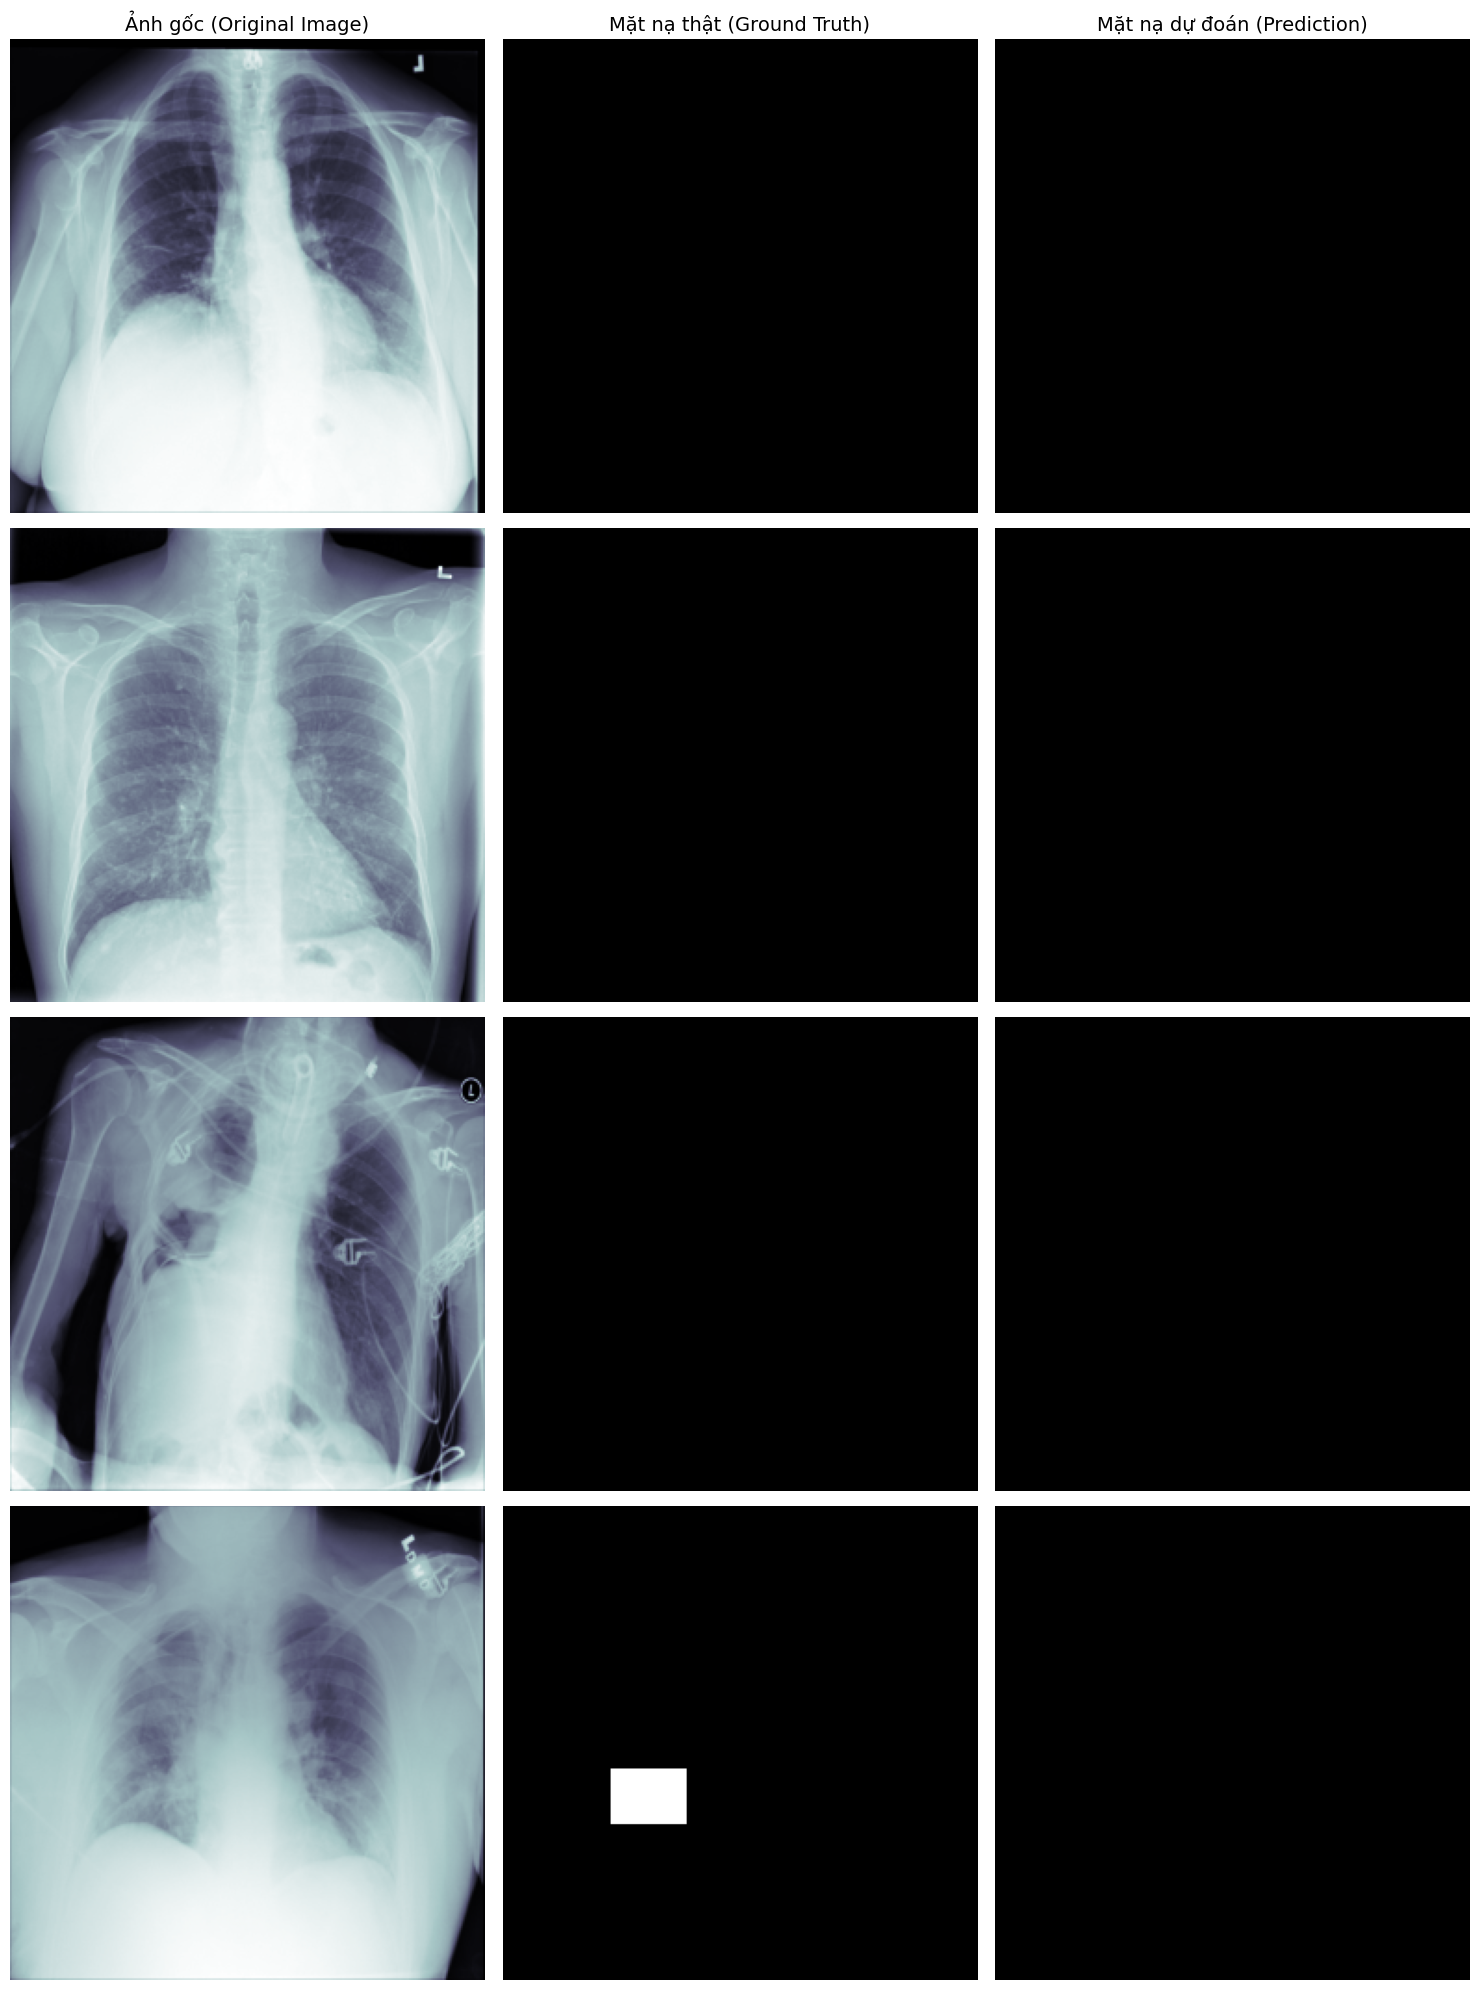

In [12]:
# @title 3.2. D·ª± ƒëo√°n v√† Tr·ª±c quan h√≥a
import matplotlib.pyplot as plt

# 1. L·∫•y m·ªôt batch d·ªØ li·ªáu t·ª´ t·∫≠p validation ƒë·ªÉ ki·ªÉm tra
print("‚ñ∂Ô∏è L·∫•y d·ªØ li·ªáu m·∫´u ƒë·ªÉ d·ª± ƒëo√°n...")
val_images, val_masks_true = next(val_gen)

# 2. Th·ª±c hi·ªán d·ª± ƒëo√°n
print("‚ñ∂Ô∏è Th·ª±c hi·ªán d·ª± ƒëo√°n...")
val_masks_pred = best_model.predict(val_images)

# 3. Hi·ªÉn th·ªã k·∫øt qu·∫£ so s√°nh
print("‚ñ∂Ô∏è Hi·ªÉn th·ªã k·∫øt qu·∫£ so s√°nh...")
n_samples = 4 # S·ªë l∆∞·ª£ng m·∫´u mu·ªën hi·ªÉn th·ªã
fig, axes = plt.subplots(n_samples, 3, figsize=(15, n_samples * 5))

# ƒê·∫∑t ti√™u ƒë·ªÅ cho c√°c c·ªôt
axes[0, 0].set_title("·∫¢nh g·ªëc (Original Image)", fontsize=14)
axes[0, 1].set_title("M·∫∑t n·∫° th·∫≠t (Ground Truth)", fontsize=14)
axes[0, 2].set_title("M·∫∑t n·∫° d·ª± ƒëo√°n (Prediction)", fontsize=14)

for i in range(n_samples):
    # Hi·ªÉn th·ªã ·∫£nh g·ªëc
    axes[i, 0].imshow(val_images[i].squeeze(), cmap='bone')
    axes[i, 0].axis('off')

    # Hi·ªÉn th·ªã m·∫∑t n·∫° th·∫≠t
    axes[i, 1].imshow(val_masks_true[i].squeeze(), cmap='gray')
    axes[i, 1].axis('off')

    # Hi·ªÉn th·ªã m·∫∑t n·∫° d·ª± ƒëo√°n v·ªõi ng∆∞·ª°ng 0.5 ƒë·ªÉ chuy·ªÉn th√†nh ·∫£nh ƒëen tr·∫Øng
    axes[i, 2].imshow(val_masks_pred[i].squeeze() > 0.5, cmap='gray')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

## **Stage 4: Testing Report**

TR·ª∞C QUAN H√ìA B√ÅO C√ÅO K·∫æT QU·∫¢ U-NET

‚ñ∂Ô∏è 1. T·∫£i m√¥ h√¨nh t·ªët nh·∫•t...
‚úÖ T·∫£i m√¥ h√¨nh th√†nh c√¥ng.

‚ñ∂Ô∏è 2. ƒê√°nh gi√° ƒë·ªãnh l∆∞·ª£ng tr√™n t·∫≠p Validation...

--- B·∫£ng k·∫øt qu·∫£ ƒë·ªãnh l∆∞·ª£ng ---
                     Metric  Score
            Validation Loss 0.9297
Validation Dice Coefficient 0.0699
 Validation Binary Accuracy 0.9891
--------------------------------


‚ñ∂Ô∏è 3. V·∫Ω bi·ªÉu ƒë·ªì l·ªãch s·ª≠ hu·∫•n luy·ªán...


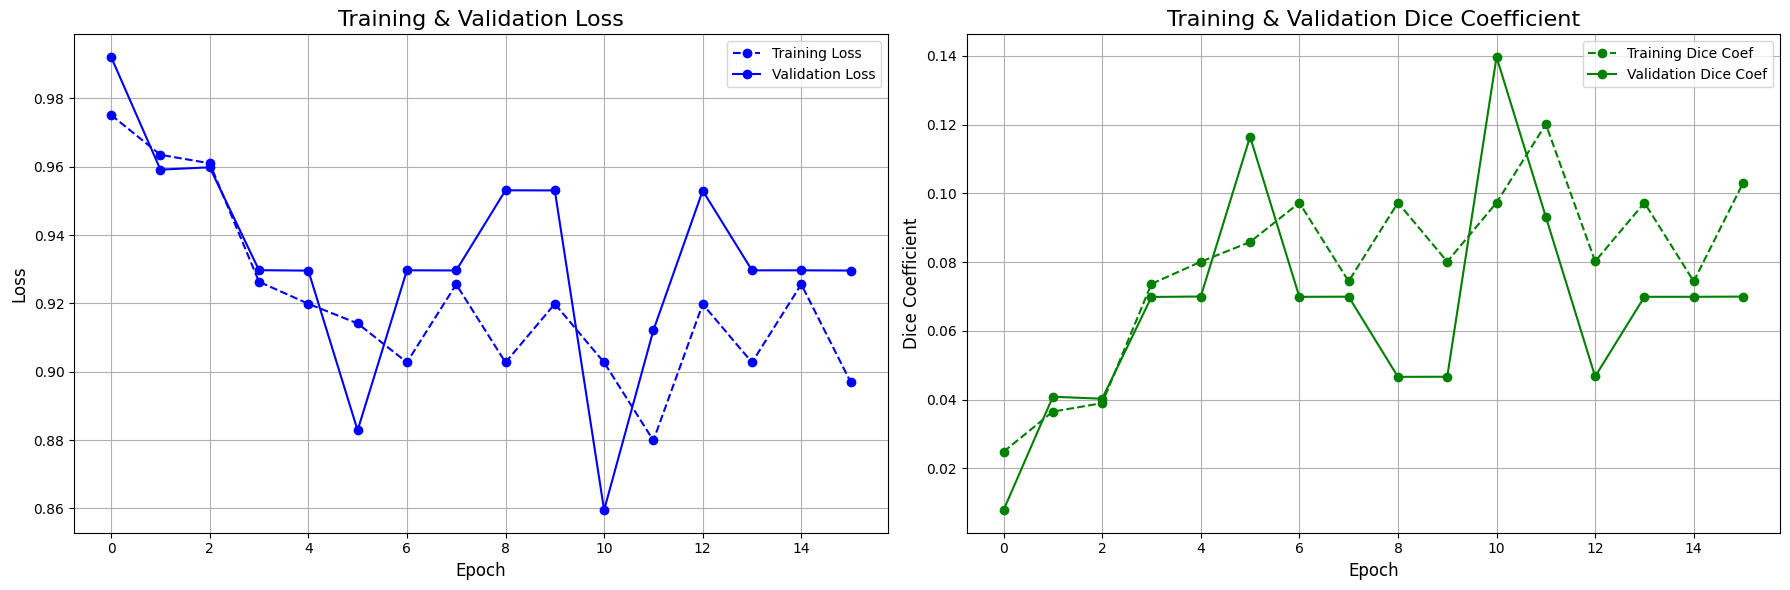


‚ñ∂Ô∏è 4. Tr·ª±c quan h√≥a k·∫øt qu·∫£ d·ª± ƒëo√°n...


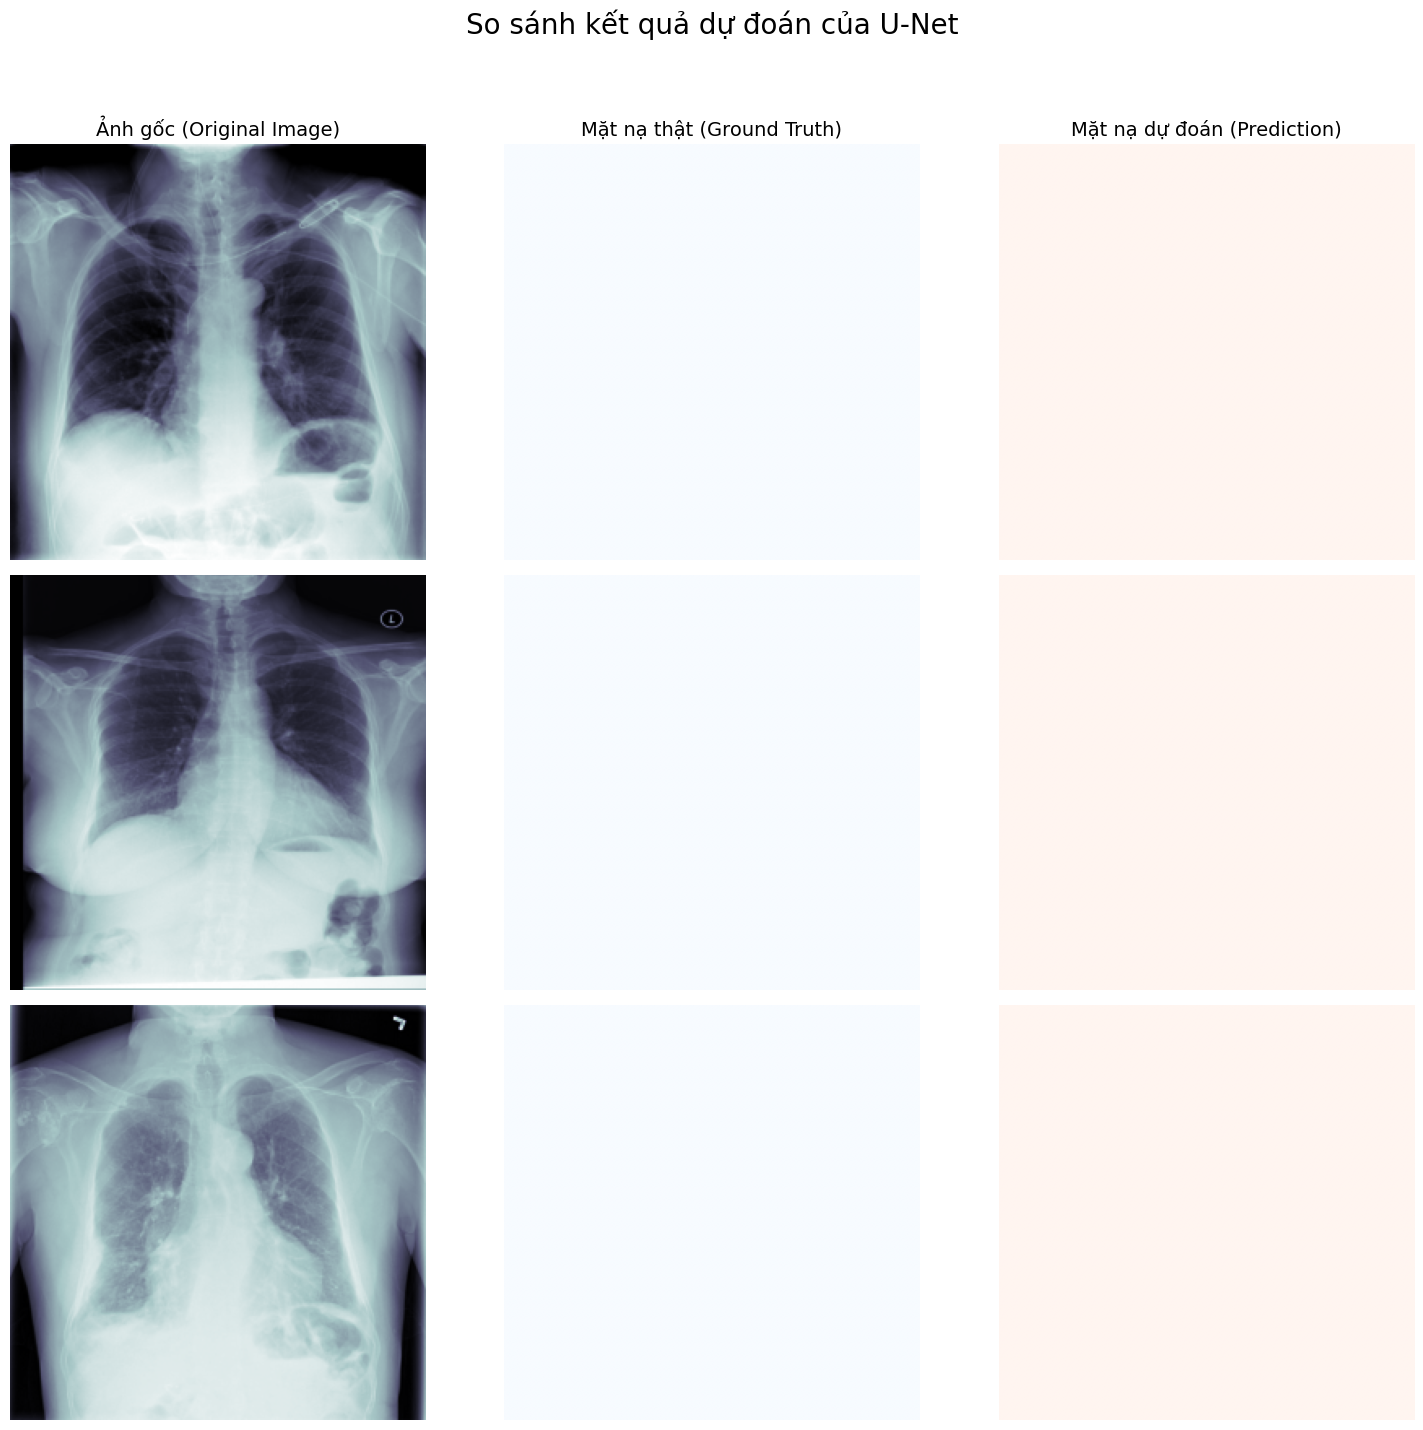

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
import os
import pandas as pd

# --- ƒê·ªãnh nghƒ©a l·∫°i c√°c h√†m v√† bi·∫øn c·∫ßn thi·∫øt ---
# (ƒê·∫£m b·∫£o c√°c bi·∫øn t·ª´ c√°c b∆∞·ªõc tr∆∞·ªõc v·∫´n t·ªìn t·∫°i trong phi√™n l√†m vi·ªác)

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

# ƒê∆∞·ªùng d·∫´n t·ªõi model ƒë√£ l∆∞u
MODEL_SAVE_PATH = os.path.join(DATA_DIR_DRIVE, 'unet_rsna_best_fast.keras')

# --- B·∫Øt ƒë·∫ßu tr·ª±c quan h√≥a ---

print("="*50)
print("TR·ª∞C QUAN H√ìA B√ÅO C√ÅO K·∫æT QU·∫¢ U-NET")
print("="*50)


# 1. T·∫£i m√¥ h√¨nh t·ªët nh·∫•t ƒë√£ l∆∞u
print("\n‚ñ∂Ô∏è 1. T·∫£i m√¥ h√¨nh t·ªët nh·∫•t...")
try:
    best_model = tf.keras.models.load_model(
        MODEL_SAVE_PATH,
        custom_objects={'dice_loss': dice_loss, 'dice_coef': dice_coef}
    )
    print("‚úÖ T·∫£i m√¥ h√¨nh th√†nh c√¥ng.")
except Exception as e:
    print(f"L·ªñI: Kh√¥ng th·ªÉ t·∫£i m√¥ h√¨nh. H√£y ch·∫Øc ch·∫Øn r·∫±ng b·∫°n ƒë√£ hu·∫•n luy·ªán xong v√† t·ªáp t·ªìn t·∫°i. L·ªói: {e}")
    # Tho√°t kh·ªèi √¥ m√£ n·∫øu kh√¥ng t·∫£i ƒë∆∞·ª£c model
    raise e

# --- 2. ƒê√°nh gi√° ƒë·ªãnh l∆∞·ª£ng ---
print("\n‚ñ∂Ô∏è 2. ƒê√°nh gi√° ƒë·ªãnh l∆∞·ª£ng tr√™n t·∫≠p Validation...")
validation_steps = len(val_ids) // BATCH_SIZE if (len(val_ids) // BATCH_SIZE) > 0 else 1
eval_results = best_model.evaluate(val_gen, steps=validation_steps, verbose=0)

# T·∫°o v√† hi·ªÉn th·ªã b·∫£ng k·∫øt qu·∫£
results_df = pd.DataFrame({
    'Metric': ['Validation Loss', 'Validation Dice Coefficient', 'Validation Binary Accuracy'],
    'Score': [f"{eval_results[0]:.4f}", f"{eval_results[1]:.4f}", f"{eval_results[2]:.4f}"]
})
print("\n--- B·∫£ng k·∫øt qu·∫£ ƒë·ªãnh l∆∞·ª£ng ---")
print(results_df.to_string(index=False))
print("--------------------------------\n")


# --- 3. Bi·ªÉu ƒë·ªì l·ªãch s·ª≠ hu·∫•n luy·ªán ---
# Bi·∫øn 'history' ƒë∆∞·ª£c t·∫°o ra t·ª´ l·ªánh model.fit() ·ªü b∆∞·ªõc tr∆∞·ªõc
print("\n‚ñ∂Ô∏è 3. V·∫Ω bi·ªÉu ƒë·ªì l·ªãch s·ª≠ hu·∫•n luy·ªán...")
if 'history' in locals() or 'history' in globals():
    plt.figure(figsize=(18, 6))

    # Bi·ªÉu ƒë·ªì Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='blue', marker='o')
    plt.title('Training & Validation Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Bi·ªÉu ƒë·ªì Dice Coefficient
    plt.subplot(1, 2, 2)
    plt.plot(history.history['dice_coef'], label='Training Dice Coef', color='green', marker='o', linestyle='--')
    plt.plot(history.history['val_dice_coef'], label='Validation Dice Coef', color='green', marker='o')
    plt.title('Training & Validation Dice Coefficient', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Dice Coefficient', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("C·∫£nh b√°o: Kh√¥ng t√¨m th·∫•y bi·∫øn 'history'. H√£y ch·∫°y l·∫°i b∆∞·ªõc hu·∫•n luy·ªán ƒë·ªÉ t·∫°o bi·ªÉu ƒë·ªì.")


# --- 4. K·∫øt qu·∫£ d·ª± ƒëo√°n ƒë·ªãnh t√≠nh ---
print("\n‚ñ∂Ô∏è 4. Tr·ª±c quan h√≥a k·∫øt qu·∫£ d·ª± ƒëo√°n...")
# L·∫•y m·ªôt batch d·ªØ li·ªáu t·ª´ t·∫≠p validation
val_images, val_masks_true = next(val_gen)
# D·ª± ƒëo√°n
val_masks_pred = best_model.predict(val_images, verbose=0)

# Hi·ªÉn th·ªã
n_samples = 3
fig, axes = plt.subplots(n_samples, 3, figsize=(15, n_samples * 5))
fig.suptitle('So s√°nh k·∫øt qu·∫£ d·ª± ƒëo√°n c·ªßa U-Net', fontsize=20)

axes[0, 0].set_title("·∫¢nh g·ªëc (Original Image)", fontsize=14)
axes[0, 1].set_title("M·∫∑t n·∫° th·∫≠t (Ground Truth)", fontsize=14)
axes[0, 2].set_title("M·∫∑t n·∫° d·ª± ƒëo√°n (Prediction)", fontsize=14)

for i in range(n_samples):
    axes[i, 0].imshow(val_images[i].squeeze(), cmap='bone')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(val_masks_true[i].squeeze(), cmap='Blues')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(val_masks_pred[i].squeeze() > 0.5, cmap='Reds') # Ng∆∞·ª°ng 0.5
    axes[i, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ***COMPARITION***

In [28]:
import pandas as pd
from IPython.display import display, Markdown

# --- NH·∫¨P K·∫æT QU·∫¢ B·∫†N THU ƒê∆Ø·ª¢C V√ÄO ƒê√ÇY ---
# K·∫øt qu·∫£ t·ª´ YOLOv8 (ƒë√£ c√≥ t·ª´ l·∫ßn train tr∆∞·ªõc)
yolo_map50 = 0.809
yolo_speed_fps = "R·∫•t nhanh (~50-100 FPS tr√™n GPU)" # ∆Ø·ªõc t√≠nh

# K·∫øt qu·∫£ t·ª´ U-Net (l·∫•y t·ª´ √¥ m√£ tr·ª±c quan h√≥a ·ªü tr√™n)
# eval_results[1] l√† gi√° tr·ªã val_dice_coef
unet_dice_coef = eval_results[1]
unet_speed_fps = "Ch·∫≠m h∆°n (~5-15 FPS tr√™n GPU)" # ∆Ø·ªõc t√≠nh
# ---

# T·∫°o DataFrame ƒë·ªÉ so s√°nh
comparison_data = {
    "Ti√™u ch√≠": [
        "M·ª•c ti√™u ch√≠nh",
        "Lo·∫°i Output",
        "Metric ch√≠nh",
        "K·∫øt qu·∫£ (Hi·ªáu su·∫•t)",
        "T·ªëc ƒë·ªô",
        "·ª®ng d·ª•ng ph√π h·ª£p"
    ],
    "M√¥ h√¨nh YOLOv8": [
        "Ph√°t hi·ªán (Detection)",
        "T·ªça ƒë·ªô h·ªôp gi·ªõi h·∫°n (Bounding Box)",
        "mAP@50",
        f"{yolo_map50:.3f}",
        yolo_speed_fps,
        "S√†ng l·ªçc nhanh, x√°c ƒë·ªãnh v·ªã tr√≠ nghi ng·ªù"
    ],
    "M√¥ h√¨nh U-Net": [
        "Ph√¢n v√πng (Segmentation)",
        "M·∫∑t n·∫° ƒëi·ªÉm ·∫£nh (Pixel Mask)",
        "Dice Coefficient",
        f"{unet_dice_coef:.3f}",
        unet_speed_fps,
        "ƒê√°nh gi√° chi ti·∫øt, ƒëo l∆∞·ªùng k√≠ch th∆∞·ªõc v√πng t·ªïn th∆∞∆°ng"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# --- Hi·ªÉn th·ªã k·∫øt qu·∫£ ---

display(Markdown("## B·∫£ng so s√°nh hi·ªáu su·∫•t m√¥ h√¨nh YOLOv8 v√† U-Net"))
display(comparison_df)

display(Markdown("""
### Ph√¢n t√≠ch v√† Nh·∫≠n x√©t

T·ª´ b·∫£ng tr√™n, ta c√≥ th·ªÉ r√∫t ra nh·ªØng nh·∫≠n x√©t quan tr·ªçng sau:

1.  **T√≠nh b·ªï tr·ª£, kh√¥ng ph·∫£i thay th·∫ø:** YOLOv8 v√† U-Net kh√¥ng th·ª±c s·ª± c·∫°nh tranh tr·ª±c ti·∫øp m√† ch√∫ng b·ªï tr·ª£ cho nhau. M·ªói m√¥ h√¨nh xu·∫•t s·∫Øc trong m·ªôt nhi·ªám v·ª• kh√°c nhau, ph√π h·ª£p v·ªõi c√°c giai ƒëo·∫°n kh√°c nhau trong quy tr√¨nh ch·∫©n ƒëo√°n y t·∫ø.

2.  **YOLOv8 - T·ªëc ƒë·ªô l√† ∆∞u ti√™n:** V·ªõi t·ªëc ƒë·ªô x·ª≠ l√Ω r·∫•t cao, YOLOv8 l√† l·ª±a ch·ªçn l√Ω t∆∞·ªüng cho c√°c h·ªá th·ªëng **s√†ng l·ªçc t·ª± ƒë·ªông ban ƒë·∫ßu**. N√≥ c√≥ th·ªÉ nhanh ch√≥ng qu√©t qua h√†ng ng√†n ·∫£nh X-quang ƒë·ªÉ x√°c ƒë·ªãnh c√°c ca b·ªánh c√≥ d·∫•u hi·ªáu b·∫•t th∆∞·ªùng (n·ªët ph·ªïi) v√† g·∫Øn c·ªù ch√∫ng ƒë·ªÉ c√°c b√°c sƒ© X-quang xem x√©t k·ªπ h∆°n.

3.  **U-Net - ƒê·ªô ch√≠nh x√°c chi ti·∫øt:** Khi m·ªôt ca b·ªánh ƒë√£ ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† c√≥ t·ªïn th∆∞∆°ng (vi√™m ph·ªïi), U-Net ph√°t huy vai tr√≤ c·ªßa m√¨nh. B·∫±ng c√°ch t·∫°o ra m·ªôt m·∫∑t n·∫° ph√¢n v√πng ch√≠nh x√°c ƒë·∫øn t·ª´ng ƒëi·ªÉm ·∫£nh, U-Net cho ph√©p c√°c b√°c sƒ© **ƒëo l∆∞·ªùng ch√≠nh x√°c k√≠ch th∆∞·ªõc, di·ªán t√≠ch, v√† h√¨nh d·∫°ng c·ªßa v√πng b·ªã ·∫£nh h∆∞·ªüng**. Th√¥ng tin n√†y r·∫•t quan tr·ªçng ƒë·ªÉ ƒë√°nh gi√° m·ª©c ƒë·ªô nghi√™m tr·ªçng c·ªßa b·ªánh v√† theo d√µi ti·∫øn tr√¨nh ƒëi·ªÅu tr·ªã.

**K·∫øt lu·∫≠n d·ª± √°n:** Nghi√™n c·ª©u ƒë√£ cho th·∫•y vi·ªác k·∫øt h·ª£p s·ª©c m·∫°nh c·ªßa c·∫£ hai ki·∫øn tr√∫c l√† m·ªôt h∆∞·ªõng ƒëi hi·ªáu qu·∫£. M·ªôt quy tr√¨nh ch·∫©n ƒëo√°n ho√†n ch·ªânh c√≥ th·ªÉ b·∫Øt ƒë·∫ßu b·∫±ng YOLOv8 ƒë·ªÉ ph√°t hi·ªán nhanh v√† k·∫øt th√∫c b·∫±ng U-Net ƒë·ªÉ ph√¢n t√≠ch s√¢u, t·ª´ ƒë√≥ t·ªëi ∆∞u h√≥a th·ªùi gian cho b√°c sƒ© v√† tƒÉng c∆∞·ªùng ƒë·ªô ch√≠nh x√°c trong ch·∫©n ƒëo√°n.
"""))

## B·∫£ng so s√°nh hi·ªáu su·∫•t m√¥ h√¨nh YOLOv8 v√† U-Net

Ti√™u ch√≠                            M√¥ h√¨nh YOLOv8  \
0       M·ª•c ti√™u ch√≠nh                     Ph√°t hi·ªán (Detection)   
1          Lo·∫°i Output        T·ªça ƒë·ªô h·ªôp gi·ªõi h·∫°n (Bounding Box)   
2         Metric ch√≠nh                                    mAP@50   
3  K·∫øt qu·∫£ (Hi·ªáu su·∫•t)                                     0.809   
4               T·ªëc ƒë·ªô          R·∫•t nhanh (~50-100 FPS tr√™n GPU)   
5     ·ª®ng d·ª•ng ph√π h·ª£p  S√†ng l·ªçc nhanh, x√°c ƒë·ªãnh v·ªã tr√≠ nghi ng·ªù   

                                       M√¥ h√¨nh U-Net  
0                           Ph√¢n v√πng (Segmentation)  
1                       M·∫∑t n·∫° ƒëi·ªÉm ·∫£nh (Pixel Mask)  
2                                   Dice Coefficient  
3                                              0.070  
4                      Ch·∫≠m h∆°n (~5-15 FPS tr√™n GPU)  
5  ƒê√°nh gi√° chi ti·∫øt, ƒëo l∆∞·ªùng k√≠ch th∆∞·ªõc v√πng t·ªï...


### Ph√¢n t√≠ch v√† Nh·∫≠n x√©t

T·ª´ b·∫£ng tr√™n, ta c√≥ th·ªÉ r√∫t ra nh·ªØng nh·∫≠n x√©t quan tr·ªçng sau:

1.  **T√≠nh b·ªï tr·ª£, kh√¥ng ph·∫£i thay th·∫ø:** YOLOv8 v√† U-Net kh√¥ng th·ª±c s·ª± c·∫°nh tranh tr·ª±c ti·∫øp m√† ch√∫ng b·ªï tr·ª£ cho nhau. M·ªói m√¥ h√¨nh xu·∫•t s·∫Øc trong m·ªôt nhi·ªám v·ª• kh√°c nhau, ph√π h·ª£p v·ªõi c√°c giai ƒëo·∫°n kh√°c nhau trong quy tr√¨nh ch·∫©n ƒëo√°n y t·∫ø.

2.  **YOLOv8 - T·ªëc ƒë·ªô l√† ∆∞u ti√™n:** V·ªõi t·ªëc ƒë·ªô x·ª≠ l√Ω r·∫•t cao, YOLOv8 l√† l·ª±a ch·ªçn l√Ω t∆∞·ªüng cho c√°c h·ªá th·ªëng **s√†ng l·ªçc t·ª± ƒë·ªông ban ƒë·∫ßu**. N√≥ c√≥ th·ªÉ nhanh ch√≥ng qu√©t qua h√†ng ng√†n ·∫£nh X-quang ƒë·ªÉ x√°c ƒë·ªãnh c√°c ca b·ªánh c√≥ d·∫•u hi·ªáu b·∫•t th∆∞·ªùng (n·ªët ph·ªïi) v√† g·∫Øn c·ªù ch√∫ng ƒë·ªÉ c√°c b√°c sƒ© X-quang xem x√©t k·ªπ h∆°n.

3.  **U-Net - ƒê·ªô ch√≠nh x√°c chi ti·∫øt:** Khi m·ªôt ca b·ªánh ƒë√£ ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† c√≥ t·ªïn th∆∞∆°ng (vi√™m ph·ªïi), U-Net ph√°t huy vai tr√≤ c·ªßa m√¨nh. B·∫±ng c√°ch t·∫°o ra m·ªôt m·∫∑t n·∫° ph√¢n v√πng ch√≠nh x√°c ƒë·∫øn t·ª´ng ƒëi·ªÉm ·∫£nh, U-Net cho ph√©p c√°c b√°c sƒ© **ƒëo l∆∞·ªùng ch√≠nh x√°c k√≠ch th∆∞·ªõc, di·ªán t√≠ch, v√† h√¨nh d·∫°ng c·ªßa v√πng b·ªã ·∫£nh h∆∞·ªüng**. Th√¥ng tin n√†y r·∫•t quan tr·ªçng ƒë·ªÉ ƒë√°nh gi√° m·ª©c ƒë·ªô nghi√™m tr·ªçng c·ªßa b·ªánh v√† theo d√µi ti·∫øn tr√¨nh ƒëi·ªÅu tr·ªã.

**K·∫øt lu·∫≠n d·ª± √°n:** Nghi√™n c·ª©u ƒë√£ cho th·∫•y vi·ªác k·∫øt h·ª£p s·ª©c m·∫°nh c·ªßa c·∫£ hai ki·∫øn tr√∫c l√† m·ªôt h∆∞·ªõng ƒëi hi·ªáu qu·∫£. M·ªôt quy tr√¨nh ch·∫©n ƒëo√°n ho√†n ch·ªânh c√≥ th·ªÉ b·∫Øt ƒë·∫ßu b·∫±ng YOLOv8 ƒë·ªÉ ph√°t hi·ªán nhanh v√† k·∫øt th√∫c b·∫±ng U-Net ƒë·ªÉ ph√¢n t√≠ch s√¢u, t·ª´ ƒë√≥ t·ªëi ∆∞u h√≥a th·ªùi gian cho b√°c sƒ© v√† tƒÉng c∆∞·ªùng ƒë·ªô ch√≠nh x√°c trong ch·∫©n ƒëo√°n.
